In [1]:
import numpy as np
# from Homework_3_function_headers_group_3 import fdtd_1d, Fdtd1DAnimation
from matplotlib import pyplot as plt



plt.rcParams.update({
        'figure.figsize': (12/2.54, 9/2.54),
        'figure.subplot.bottom': 0.15,
        'figure.subplot.left': 0.165,
        'figure.subplot.right': 0.90,
        'figure.subplot.top': 0.9,
        'axes.grid': False,
})

plt.close('all')


In [2]:
def fdtd_1d(eps_rel, dx, time_span, source_frequency, source_position,
            source_pulse_length):
    '''Computes the temporal evolution of a pulsed excitation using the
    1D FDTD method. The temporal center of the pulse is placed at a
    simulation time of 3*source_pulse_length. The origin x=0 is in the
    center of the computational domain. All quantities have to be
    specified in SI units.

    Arguments
    ---------
        eps_rel : 1d-array
            Rel. permittivity distribution within the computational domain.
        dx : float
            Spacing of the simulation grid (please ensure dx <= lambda/20).
        time_span : float
            Time span of simulation.
        source_frequency : float
            Frequency of current source.
        source_position : float
            Spatial position of current source.
        source_pulse_length :
            Temporal width of Gaussian envelope of the source.
    '''
    # constants
    c = 2.99792458e8  
    mu0 = 4 * np.pi * 1e-7  
    eps0 = 1 / (mu0 * c ** 2)  
    dt = dx / (2 * c)
    e = dt / eps0 
    m = dt / mu0

    # temporal and spatial coordinate
    Nx = eps_rel.size
    x_span = 18e-6
    x = np.linspace(-x_span/2, x_span/2, Nx)
    Nt = int(round(time_span / dt))
    t = np.arange(Nt + 1) * dt

    # allocate field arrays
    Ez = np.zeros((Nt + 1, Nx), dtype=complex)
    Hy = np.zeros((Nt + 1, Nx - 1), dtype=complex)

    # source definition
    t0 = 3 * source_pulse_length
    # determine the position that we want to add source
    source_ind = int(round((source_position - x[0]) / dx))


    for n in range(0, Nt):
        # update Ez field
        # 0 and Nx -1 are determined by boundary conditions
        Ez[n + 1, 1:-1] = (Ez[n, 1:-1]
                + e / dx * (Hy[n, 1:] - Hy[n, :-1]) / eps_rel[1:-1])

        # source current has to  be taken as n + 1/2
        t_source = (n + 0.5) * dt - t0
        j_source = (np.exp(-1j * 2 * np.pi * source_frequency * t_source)  # carrier
                 * np.exp(-(t_source / source_pulse_length) ** 2))  # envelope
        Ez[n + 1, source_ind] -= e / eps_rel[source_ind] * j_source

        # update Hy field
        Hy[n + 1, :] = Hy[n, :] + m / dx * (Ez[n + 1, 1:] - Ez[n + 1, :-1])
    # in order to calculate the poynting vector of field, we need interpolating Hy to make it 
    # overlapped with Ez
    # interpolate Hy in temporal domain
    Hy[1:, :] = 0.5 * (Hy[:-1, :] + Hy[1:, :])
    # additional two columns with zeros at two edges of boundary. 
    Hy = np.pad(Hy, ((0,0),(1,1)), 'edge') 
    # interpolate Hy in spatial domain
    Hy = 0.5 * (Hy[:, 1:] + Hy[:, :-1])
    '''
    Returns
    -------
        Ez : 2d-array
            Z-component of E(x,t) (each row corresponds to one time step)
        Hy : 2d-array
            Y-component of H(x,t) (each row corresponds to one time step)
        x  : 1d-array
            Spatial coordinates of the field output
        t  : 1d-array
            Time of the field output
    '''
    return Ez, Hy, x, t


# Task 1
1D FDTD: The electric field is determined using the values of the magnetic field from the previous iteration. However, only the interior 2:Nx-1 of the electric field is updated. The derivative of the magnetic field is obtained by subtracting the magnetic field value of index 1:Nx-2 from the magnetic field value of index 2:Nx-1. Since the spatial dimension of the magnetic field has a length of Nx-1, a vector with Nx-2 elements is generated. eps_rel has the same grid as the electric field and is indexed in the same way. Subtracting the source currents gives the new electric field. In this process, the source time is calculated according to the change in time between the current and the electric field. A complex exponential function is used to oscillate the carrier. This creates a complex source amplitude and results in the entire FDTD implementation using a complex field. In this process, all spatial coordinates of the magnetic field are updated. and there are no boundary values to be preserved. At the end of the 1D FDTD implementation, the electric and magnetic fields are converted to a common coordinate system by interpolating the magnetic field from fractional to integer exponents.


## 1.1 
Simulate the propagation of an ultrashort pulse in a dispersion-free dielectric medium $\epsilon$(x)=1.

In [3]:
# constants
c = 2.99792458e8 # speed of light [m/s]
mu0 = 4*np.pi*1e-7 # vacuum permeability [Vs/(Am)]
eps0 = 1/(mu0*c**2) # vacuum permittivity [As/(Vm)]
Z0 = np.sqrt(mu0/eps0) # vacuum impedance [Ohm]

# geometry parameters
x_span = 18e-6 # width of computatinal domain [m]
n1 = 1 # refractive index in front of interface
n2 = 2 # refractive index behind interface
x_interface = x_span/4 #postion of dielectric interface

# simulation parameters
dx = 15e-9 # grid spacing [m]
time_span = 60e-15 # duration of simulation [s]

Nx = int(round(x_span/dx)) + 1 # number of grid points

# source parameters
source_frequency = 500e12 # [Hz]
source_position = 0 # [m]
source_pulse_length = 1e-15 # [s]
    
# %% create permittivity distribution and run simulation %%%%%%%%%%%%%%%%%%%%%%

eps_rel=np.ones((Nx,))
Ez, Hy, x, t=fdtd_1d(eps_rel, dx, time_span, source_frequency, source_position, source_pulse_length)
print(Ez.shape)
print(Hy.shape)
print(x.shape)
print(t.shape)

(2399, 1201)
(2399, 1201)
(1201,)
(2399,)


C:\Users\Sid\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


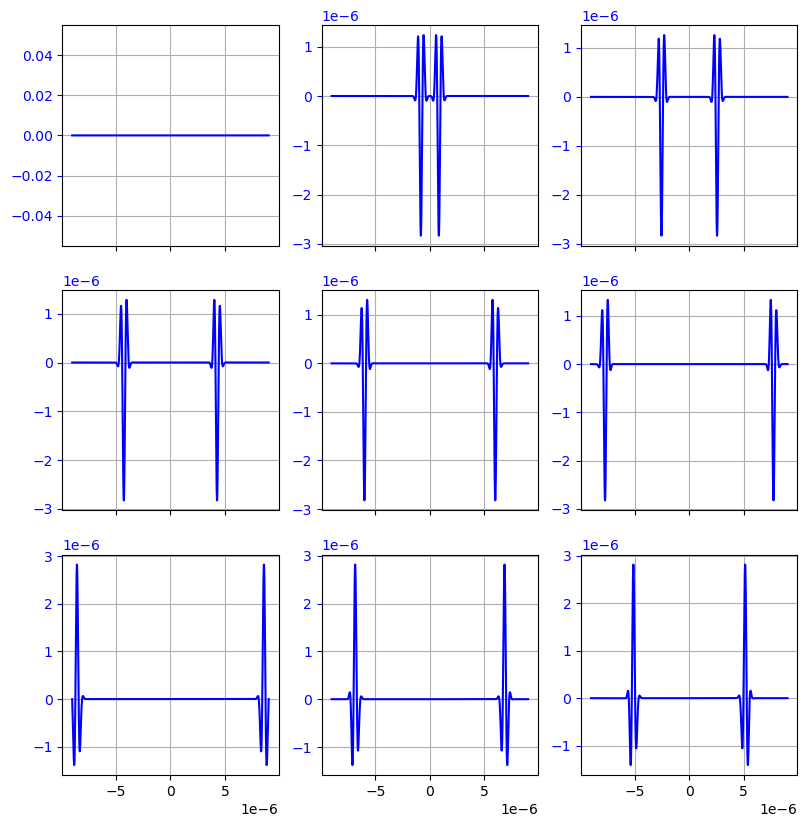

In [4]:
# %% create representative figures of the results %%%%%%%%%%%%%%%%%%%%%%%%%%%%%

fig, ax = plt.subplots(3,3,sharex= True, figsize=(10,10))
ax = ax.flat

for i in range(9):
    ax[i].plot(x, Ez[230*i, :] ,'b-', label='E in [a.u.]')
    ax[i].grid()
    ax[i].tick_params('y', colors='b') # style of line

## Discussion

Apparently, after colliding on the wall, field can bounce back and continue propagating because perfect conducting boundary condition is used in this task. We set the value of boundaries directly as zeros. Two boundaries act as the behavior of metal; therefore, reflection can be observed in this simulation. 

## 1.2
See what happens when the pulse hits the interface between two different dielectric media
with permittivities $\epsilon$ 1 = 1 and $\epsilon$ 2 = 4, the interface should be located at a distance of
4.5 µm in positive direction from the center of the computational domain.

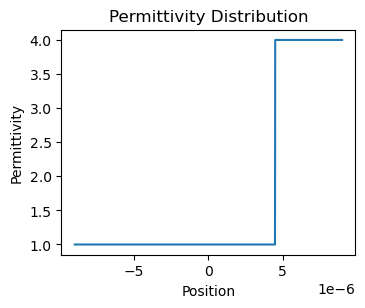

In [5]:
eps_rel=np.ones((Nx,))
indices = x >= x_span/4
eps_rel[indices] = 4
plt.figure(figsize=(4,3))
plt.plot(x, eps_rel)
plt.xlabel('Position')
plt.ylabel('Permittivity')
plt.title('Permittivity Distribution')
plt.show()

In [6]:
Ez, Hy, x, t=fdtd_1d(eps_rel, dx, time_span, source_frequency, source_position, source_pulse_length)

### Figure Description
The propagation behavior is shown below, blue line represents the amplitude of poynting vecotor, red line represents permittivity distribution. 

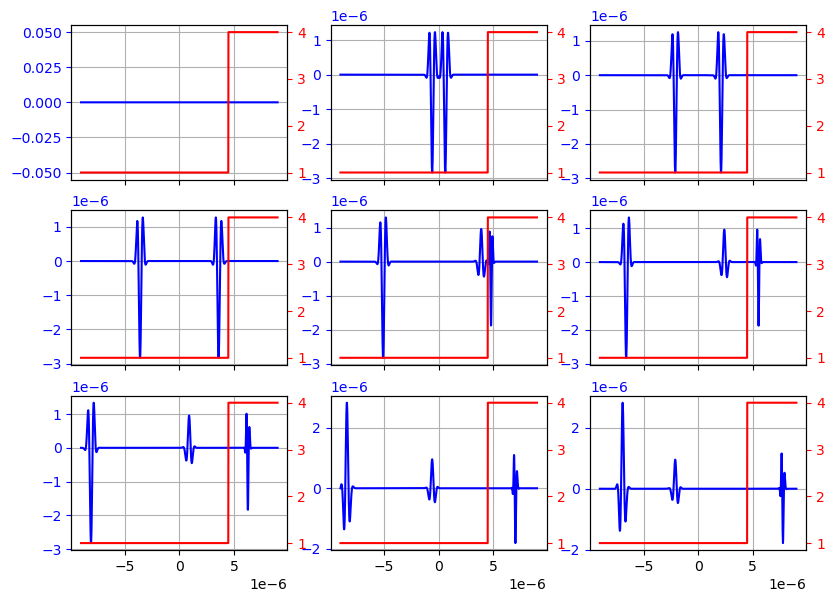

In [7]:
# %% create representative figures of the results %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig, ax = plt.subplots(3,3,sharex= True, figsize=(10,7))
ax = ax.flat

for i in range(9):
    ax[i].plot(x, Ez[200*i, :] ,'b-', label='E in [a.u.]')
    ax[i].grid()
    ax[i].tick_params('y', colors='b') # style of line
    
    ax2 = ax[i].twinx()
    ax2.plot(x, eps_rel, 'r-',label='permittivity')
    ax2.tick_params('y', colors='r')

## Discussion

In this case, after the field across through the interface of different material, both transmission and reflection can be observed. Based on the formula $ \frac{(n1-n2)^2}{(n1+n2)^2} $ , the reflectance can be derived as 11%.  This can be also confirmed in the simulation that most part of field can transmit through the interface.  Similarly as previous task, after fields collide on the metal boundary, they can be totally reflected and keep propagating. 

# 2. 3D FDTD case
3D FDTD:
The derivatives of the magnetic field components are calculated at the inner grid points without boundary values and stored in a temporary array. The source term is subtracted from this array and then multiplied by the interpolated inverse derivative. Finally, the old field values from the inner grid points are added to the new field. If so, the field is interpolated into the grid of eps_rel before the 𝑧-sheet is extracted at the 𝑧-index specified by z_ind. Finally, the updated field is written back to the original field matrix after interpolation. After the electric field components have been taken into account, the new magnetic field components are calculated. The magnetic field components are stored in the original field and an interpolation function is used to calculate the average of the old and the new magnetic field. In this way, the magnetic field can be determined in the same time step as the stored electric field components.

When simulating the propagation of electromagnetic fields in a homogeneous medium with a refractive index 𝑛 = 1, the 3D FDTD method is used. Five grid points were defined along the 𝑧-direction. and the grid resolution was set to Δ𝑟 = 30 nm. A 𝑧-polarised line current with a Gaussian spatial profile along 𝑥 and 𝑦 at the centre of the computational domain was used for excitation. The duration of the simulation is 𝑇 = 10 fs. and the 𝑧-polarised current source excites only the 𝑧-component of the electric field. Since the current density is constant along the 𝑧-axis and the 𝑧-component of the electric field is not affected by the PEC boundary in the 𝑧-direction, there are no 𝑥- and 𝑦-components of the electric field and no 𝑧-component of the magnetic field.


In [8]:
def field_source(x, y, t, j0, f, t0, tau, w):
    time_term = np.exp(-2 * np.pi * 1j * f * t)
    temporal_envelope = np.exp(-(t - t0)**2 / (2 * tau**2))
    spatial_distribution = np.exp(-(x**2 + y**2) / (w**2))
    
    field = j0 * time_term * temporal_envelope * spatial_distribution
    return field

## Discussion

# 3. Convergence test

## 3.1 1D case: dx test

In [3]:
def fdtd_1d_convergence_fixed_time(eps_rel, dx, time_span, source_frequency, source_position,
            source_pulse_length):
    '''Computes the temporal evolution of a pulsed excitation using the
    1D FDTD method. The temporal center of the pulse is placed at a
    simulation time of 3*source_pulse_length. The origin x=0 is in the
    center of the computational domain. All quantities have to be
    specified in SI units.

    Arguments
    ---------
        eps_rel : 1d-array
            Rel. permittivity distribution within the computational domain.
        dx : float
            Spacing of the simulation grid (please ensure dx <= lambda/20).
        time_span : float
            Time span of simulation.
        source_frequency : float
            Frequency of current source.
        source_position : float
            Spatial position of current source.
        source_pulse_length :
            Temporal width of Gaussian envelope of the source.
    '''
    # constants
    c = 2.99792458e8  
    mu0 = 4 * np.pi * 1e-7  
    eps0 = 1 / (mu0 * c ** 2)
    dt = 10e-9 / (2*c)
    e = dt / eps0 
    m = dt / mu0
    
    lam = c/source_frequency
    
    if dx > lam/20/np.sqrt(np.max(eps_rel)):
        dx = lam/20/np.sqrt(np.max(eps_rel))
    else:
        pass
    
    # temporal and spatial coordinate
    Nx = eps_rel.size
    x_span = 18e-6
    x = np.linspace(-x_span/2, x_span/2, Nx)
    Nt = int(round(time_span / dt))
    t = np.arange(Nt + 1) * dt

    # allocate field arrays
    Ez = np.zeros((Nt + 1, Nx), dtype=complex)
    Hy = np.zeros((Nt + 1, Nx - 1), dtype=complex)

    # source definition
    t0 = 3 * source_pulse_length
    # determine the position that we want to add source
    source_ind = int(round((source_position - x[0]) / dx))

    for n in range(0, Nt):
        # update Ez field
        # 0 and Nx -1 are determined by boundary conditions
        Ez[n + 1, 1:-1] = (Ez[n, 1:-1]
                + e / dx * (Hy[n, 1:] - Hy[n, :-1]) / eps_rel[1:-1])

        # source current has to  be taken as n + 1/2
        t_source = (n + 0.5) * dt - t0
        j_source = (np.exp(-1j * 2 * np.pi * source_frequency * t_source)  # carrier
                 * np.exp(-(t_source / source_pulse_length) ** 2))  # envelope
        Ez[n + 1, source_ind] -= e / eps_rel[source_ind] * j_source

        # update Hy field
        Hy[n + 1, :] = Hy[n, :] + m / dx * (Ez[n + 1, 1:] - Ez[n + 1, :-1])
    # in order to calculate the poynting vector of field, we need interpolating Hy to make it 
    # overlapped with Ez
    # interpolate Hy in temporal domain
    Hy[1:, :] = 0.5 * (Hy[:-1, :] + Hy[1:, :])
    # additional two columns with zeros at two edges of boundary. 
    Hy = np.pad(Hy, ((0,0),(1,1)), 'edge') 
    # interpolate Hy in spatial domain
    Hy = 0.5 * (Hy[:, 1:] + Hy[:, :-1])
    '''
    Returns
    -------
        Ez : 2d-array
            Z-component of E(x,t) (each row corresponds to one time step)
        Hy : 2d-array
            Y-component of H(x,t) (each row corresponds to one time step)
        x  : 1d-array
            Spatial coordinates of the field output
        t  : 1d-array
            Time of the field output
    '''
    return Ez, Hy, x, t


In [4]:
# Define the fdtd_1d function with the provided implementation

# constants
c = 2.99792458e8
mu0 = 4 * np.pi * 1e-7
eps0 = 1 / (mu0 * c ** 2)
Z0 = np.sqrt(mu0 / eps0)

# geometry parameters
x_span = 18e-6
n1 = 1

# simulation parameters
time_span = 60e-15

# source parameters
source_frequency = 500e12
source_position = 0
source_pulse_length = 1e-15



In [4]:
dx=np.linspace(10, 30, 20)*10**-9
S = np.zeros((20,))
for i, dxi in enumerate(dx):
    Nx = int(round(x_span/dxi)) + 1 # number of grid points
    eps_rel=np.ones((Nx,))
    Ez, Hy, x, t = fdtd_1d_convergence_fixed_time(eps_rel, dxi, time_span, source_frequency, source_position, source_pulse_length)
    print('Ez shape:', Ez.shape)
    print('Hy shape:', Hy.shape)
    print('---------------------------------------------------------------')

Ez shape: (3599, 1801)
Hy shape: (3599, 1801)
---------------------------------------------------------------
Ez shape: (3599, 1630)
Hy shape: (3599, 1630)
---------------------------------------------------------------
Ez shape: (3599, 1488)
Hy shape: (3599, 1488)
---------------------------------------------------------------
Ez shape: (3599, 1369)
Hy shape: (3599, 1369)
---------------------------------------------------------------
Ez shape: (3599, 1268)
Hy shape: (3599, 1268)
---------------------------------------------------------------
Ez shape: (3599, 1180)
Hy shape: (3599, 1180)
---------------------------------------------------------------
Ez shape: (3599, 1104)
Hy shape: (3599, 1104)
---------------------------------------------------------------
Ez shape: (3599, 1037)
Hy shape: (3599, 1037)
---------------------------------------------------------------
Ez shape: (3599, 978)
Hy shape: (3599, 978)
---------------------------------------------------------------
Ez shape: (3

In [19]:
dx=np.linspace(10, 30, 20)*10**-9
S = np.zeros((20,))
for i, dxi in enumerate(dx):
    Nx = int(round(x_span/dxi)) + 1 # number of grid points
    eps_rel=np.ones((Nx,))
    Ez, Hy, x, t = fdtd_1d_convergence_fixed_time(eps_rel, dxi, time_span, source_frequency, source_position, source_pulse_length)
    Ez_out=Ez[-1, :]
    Hy_out=Hy[-1, :]
    S[i]=np.sum(np.abs(Ez_out))

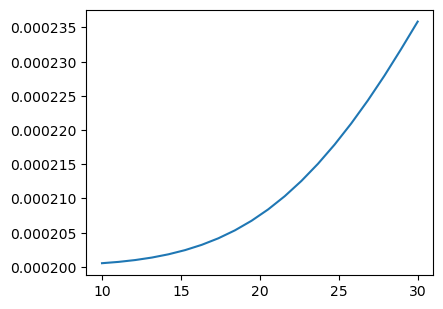

In [20]:
xx=np.linspace(10, 30, len(S))
plt.figure()
plt.plot(xx, S)

In [26]:
Nx = int(round(x_span/dx[0])) + 1 # number of grid points
eps_rel=np.ones((Nx,))
Ez, Hy, x, t = fdtd_1d_convergence_fixed_time(eps_rel, dx[0], time_span, source_frequency, source_position, source_pulse_length)

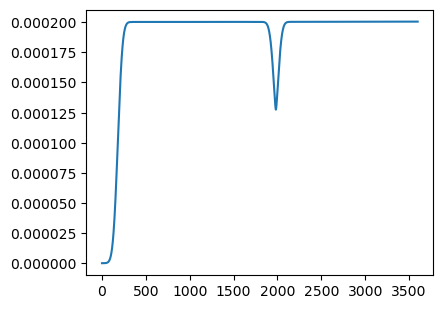

In [29]:
Ez_out = np.sum(np.abs(Ez),axis=1)
plt.plot(Ez_out)

In [28]:
np.max(np.sum(np.abs(Ez),axis=1))/0.0002

1.0026814839155305

In [31]:
np.argmin(Ez_out[500:])

1482

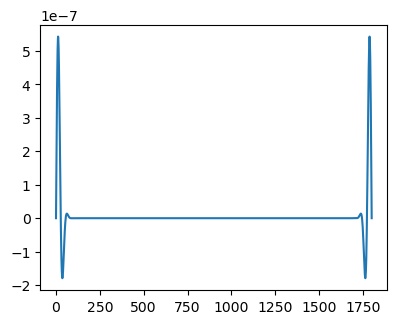

In [34]:
plt.plot(Ez[1984])